# TensorFlow and Keras

In [1]:
#Uncomment and use it
#!pip install tensorflow

In [2]:
!pip show tensorflow

Name: tensorflow
Version: 2.6.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\sreehari\anaconda3\envs\tfgpu\lib\site-packages
Requires: protobuf, gast, opt-einsum, grpcio, clang, typing-extensions, wheel, astunparse, keras, numpy, google-pasta, h5py, absl-py, flatbuffers, keras-preprocessing, tensorboard, wrapt, termcolor, six, tensorflow-estimator
Required-by: 


In [3]:
import tensorflow as tf
%matplotlib inline  

## Tensors

#### Constants

tf.constant creates constant values, these values do not change
or update during optimization process(training phase)

In [4]:
a = tf.constant([50,10])
print(a)

tf.Tensor([50 10], shape=(2,), dtype=int32)


Few things that we can do with the tensors at the runtime:
1. Directly get a numpy value of the tensor
2. dtype : data type of the tensor(int16/int32/float32/float64)
3. shape: shape of the tensor

In [5]:
print('a in tensorflow ==>', a)
print('numpy value of a ==>', a.numpy())
print('dtype of a ==>', a.dtype)
print('shape of a ==>', a.shape)

a in tensorflow ==> tf.Tensor([50 10], shape=(2,), dtype=int32)
numpy value of a ==> [50 10]
dtype of a ==> <dtype: 'int32'>
shape of a ==> (2,)


We can use inbuild tf.XX() function to create constant tensors, just like numpy.

In [6]:
print('Tensor of Ones: \n',tf.ones(shape=(2, 2)))
print('Tensor of Zeros: \n',tf.zeros(shape=(2, 2)))
print('Random normal values \n', tf.random.normal(shape=(3, 2),
                                                  mean=5, 
                                                  stddev=1))

Tensor of Ones: 
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
Tensor of Zeros: 
 tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
Random normal values 
 tf.Tensor(
[[5.4522805 6.0014324]
 [5.4652257 7.0920672]
 [3.3838544 5.1461864]], shape=(3, 2), dtype=float32)


### Variables

We generally create a variable with some values, call it initialized values, 
convert this constant tensor into a variable and then mutate the variable by using special functions.

In [7]:
x = tf.Variable(5) # Simple variable
print(x)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>


In [8]:
#randomly initialized variable, like we need for our weights
w = tf.Variable(tf.random.normal(shape=(2, 2))) 
print(w)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.17070255,  0.47234815],
       [-1.0685375 , -0.11003946]], dtype=float32)>


In [9]:
m = tf.Variable(5) # Simple variable
print(m)

m = tf.Variable(5) 
print('New value', m.assign(2))

m = tf.Variable(5) 
print('increment by 1', m.assign_add(1))

m = tf.Variable(5) 
print('Decrement by 2', m.assign_sub(2))


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>
New value <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=2>
increment by 1 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=6>
Decrement by 2 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=3>


### Regression Model building in TensorFlow

#This step is for data creation, x and y

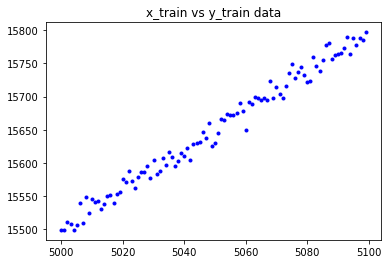

In [10]:
#This step is for data creation, x and y
import numpy as np
x_train= np.array(range(5000,5100)).reshape(-1,1)


y_train=[3*i+np.random.normal(500, 10) for i in x_train]

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.')
plt.show()

In [11]:
#Model y=X*W + b
#Model function
def output(x):
    return W*x + b

#Loss function Reduce mean square
def loss_function(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  219749456.0,  W : [[0.31288907]], b  [1.0000297]
epoch : 1, loss  197908048.0,  W : [[0.45496386]], b  [1.0000578]
epoch : 2, loss  178237456.0,  W : [[0.5897933]], b  [1.0000845]
epoch : 3, loss  160522016.0,  W : [[0.717747]], b  [1.0001099]
epoch : 4, loss  144567344.0,  W : [[0.8391754]], b  [1.000134]
epoch : 5, loss  130198464.0,  W : [[0.9544114]], b  [1.0001568]
epoch : 6, loss  117257728.0,  W : [[1.0637708]], b  [1.0001785]
epoch : 7, loss  105603192.0,  W : [[1.1675532]], b  [1.000199]
epoch : 8, loss  95107040.0,  W : [[1.2660431]], b  [1.0002185]
epoch : 9, loss  85654128.0,  W : [[1.3595103]], b  [1.000237]
epoch : 10, loss  77140760.0,  W : [[1.448211]], b  [1.0002545]
epoch : 11, loss  69473560.0,  W : [[1.5323882]], b  [1.0002712]
epoch : 12, loss  62568428.0,  W : [[1.6122727]], b  [1.000287]
epoch : 13, loss  56349608.0,  W : [[1.6880834]], b  [1.0003021]
epoch : 14, loss  50748896.0,  W : [[1.760028]], b  [1.0003164]
epoch : 15, loss  45704856.0,  W

Final Weights

In [12]:
print('w ', W)
print('b ', b)

w  <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.098773]], dtype=float32)>
b  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.0005808], dtype=float32)>


Plotting

epoch is: 0, loss is 222638752.0,  W is: [[0.29463375]], b is [1.0000298]


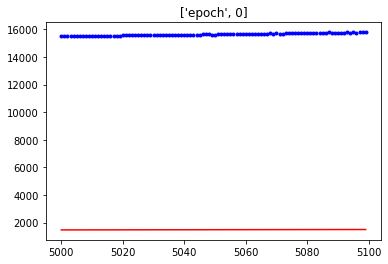

epoch is: 30, loss is 9631053.0,  W is: [[2.5156186]], b is [1.0004698]


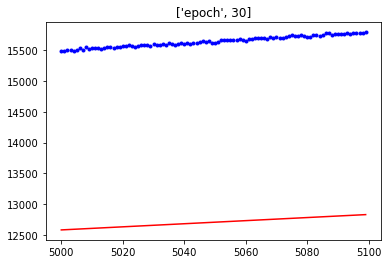

epoch is: 60, loss is 416753.03125,  W is: [[2.9775515]], b is [1.000561]


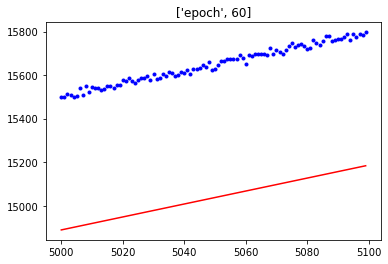

epoch is: 90, loss is 18160.365234375,  W is: [[3.073627]], b is [1.00058]


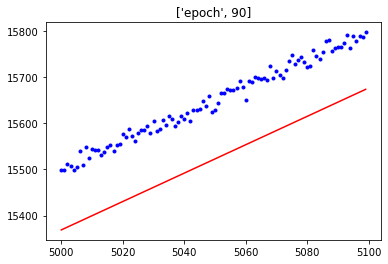

epoch is: 120, loss is 918.4893798828125,  W is: [[3.0936089]], b is [1.0005841]


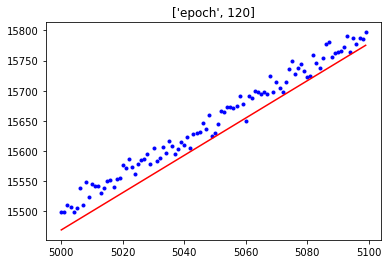

epoch is: 150, loss is 172.52003479003906,  W is: [[3.097765]], b is [1.0005841]


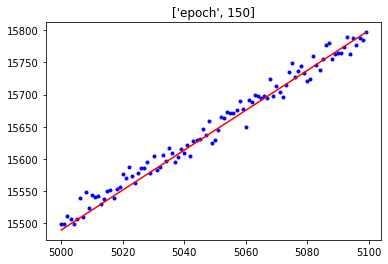

epoch is: 180, loss is 140.24147033691406,  W is: [[3.0986295]], b is [1.0005841]


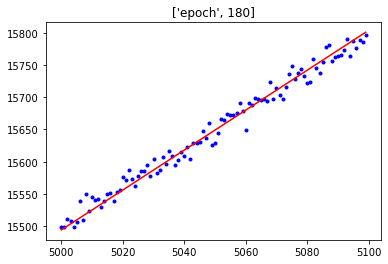

In [13]:
#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    if i%30 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b.')
        plt.plot(x_train, output(x_train), c='r')
        plt.show()

### Logistic Regression Model building in TensorFlow

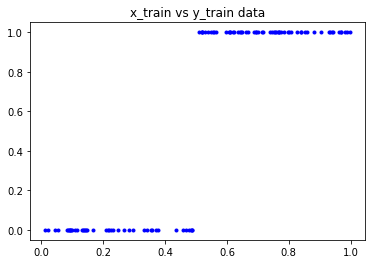

In [14]:
# This step is for data creation
x_train= np.random.rand(100,1)
y_train=np.array([0 if i < 0.5 else 1 for i in x_train]).reshape(-1,1)

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.',)
plt.show()

In [15]:
#Model y=sigmoid(X*W + b)
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  23.391420364379883,  W : [[0.93670917]], b  [0.25816748]
epoch : 1, loss  20.541446685791016,  W : [[1.1239858]], b  [-0.30233535]
epoch : 2, loss  18.21820640563965,  W : [[1.6000996]], b  [-0.31501204]
epoch : 3, loss  16.474807739257812,  W : [[1.8531415]], b  [-0.64735264]
epoch : 4, loss  15.03258991241455,  W : [[2.215887]], b  [-0.7102991]
epoch : 5, loss  13.849992752075195,  W : [[2.457747]], b  [-0.93346363]
epoch : 6, loss  12.86880111694336,  W : [[2.7411673]], b  [-1.0202637]
epoch : 7, loss  12.049297332763672,  W : [[2.9631145]], b  [-1.173966]
epoch : 8, loss  11.357682228088379,  W : [[3.1919827]], b  [-1.2695382]
epoch : 9, loss  10.767810821533203,  W : [[3.3915098]], b  [-1.3831278]
epoch : 10, loss  10.259647369384766,  W : [[3.5843217]], b  [-1.4753996]
epoch : 11, loss  9.817767143249512,  W : [[3.761722]], b  [-1.5676368]
epoch : 12, loss  9.430283546447754,  W : [[3.929794]], b  [-1.6513872]
epoch : 13, loss  9.087886810302734,  W : [[4.087767]

Plotting

epoch is: 0, loss is 24.51860237121582,  W is: [[0.86075413]], b is [0.3607019]


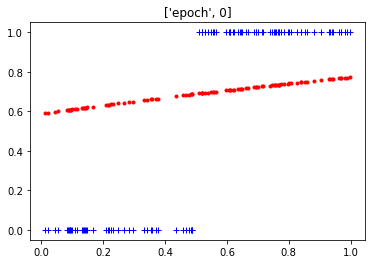

epoch is: 40, loss is 5.668291091918945,  W is: [[6.6315217]], b is [-3.0052257]


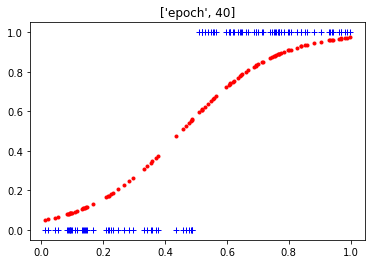

epoch is: 80, loss is 4.4657883644104,  W is: [[8.543859]], b is [-3.9727995]


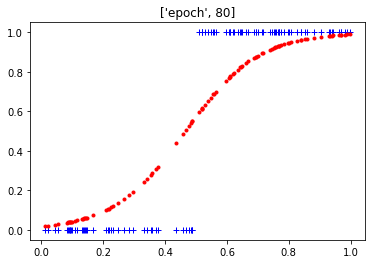

epoch is: 120, loss is 3.945295572280884,  W is: [[9.817263]], b is [-4.621879]


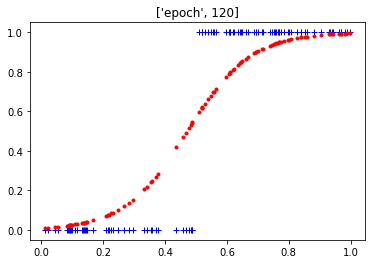

epoch is: 160, loss is 3.630699634552002,  W is: [[10.810471]], b is [-5.1296535]


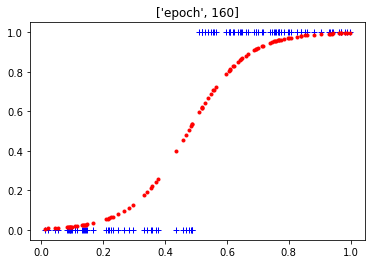

epoch is: 200, loss is 3.4110569953918457,  W is: [[11.641545]], b is [-5.555133]


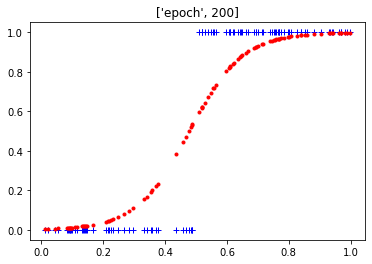

epoch is: 240, loss is 3.244807481765747,  W is: [[12.365163]], b is [-5.9258595]


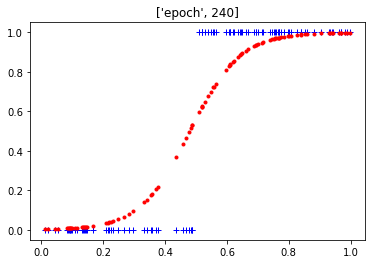

epoch is: 280, loss is 3.112292766571045,  W is: [[13.011539]], b is [-6.2571316]


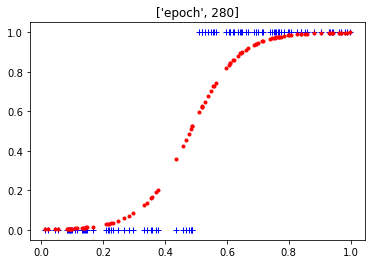

In [16]:
#Model y=X*W + b
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)

    if i%40 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b+')
        plt.plot(x_train, output(x_train), '.', c='r')
        plt.show()

# Keras

In [19]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
## The data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes=10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

11493376/11490434 [==============================] - 2s 0us/step
(60000, 784) train input samples
(10000, 784) test input samples
(60000, 10) train output samples
(10000, 10) test output samples


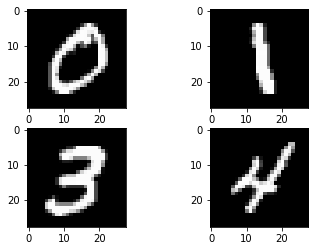

In [21]:
# Plot 4 images as gray scale

%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [22]:
model = keras.Sequential()
#Input Layer. The model needs to know what input shape it should expect. 
#For this reason, the first layer in a Sequential model needs to receive information about its input shape.
#Only the first need the snape information, because following layers can do automatic shape inference
model.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))

#The dense layer is simply a layer where each unit or neuron is connected to each neuron in the next layer.
model.add(layers.Dense(20, activation='sigmoid'))

#In the final layer mention the output classes
model.add(layers.Dense(10, activation='softmax'))

#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compiling model : we define loss function, optimizer and validation matric of our choice
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit method: actually running our model by supplying our input and validation data
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 1.0068 - accuracy: 0.7568
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3580 - accuracy: 0.9005
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2736 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2320 - accuracy: 0.9332
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2060 - accuracy: 0.9404
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1883 - accuracy: 0.9455
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1760 - accuracy: 0.9489
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1665 - accuracy: 0.9513
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1596 - accuracy: 0.9530
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.153

In [24]:
print(model.get_weights())

[array([[-0.05892526, -0.05414296, -0.03496408, ...,  0.05517781,
        -0.07779641,  0.07165894],
       [ 0.0049303 , -0.07490315, -0.04819031, ..., -0.04690649,
         0.02037498,  0.02409995],
       [ 0.02321611, -0.04151903, -0.0494222 , ..., -0.05975289,
         0.06963615,  0.05368617],
       ...,
       [-0.01076229, -0.0086471 , -0.0337502 , ..., -0.02719225,
        -0.05668506, -0.04702216],
       [ 0.08597085, -0.07209495,  0.05662455, ...,  0.05581121,
         0.05761793, -0.07838762],
       [ 0.0723203 ,  0.0358093 , -0.06299587, ...,  0.06306285,
        -0.03472571,  0.00343879]], dtype=float32), array([-0.02060986, -0.264139  , -0.31995618, -0.17204227,  0.3090679 ,
       -0.7941459 , -0.19933712, -0.1888914 , -0.11639135, -0.6946665 ,
        0.19855775,  0.16070251,  0.0447658 ,  0.25391984, -0.0816147 ,
       -0.1663646 ,  0.23004502, -0.05497823,  0.23313828, -0.13947685],
      dtype=float32), array([[ 2.3631468 , -0.01098021, -0.29057795,  0.44445822,

In [25]:
loss, acc = model.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 0.1745 - accuracy: 0.9504
Test Accuracy: 95.04%
